In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'messi_revert'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 1
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '2h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP'],
        'open': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': True
                }
            }
        },
        'close': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': True
                }
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None,
    },
    'sl': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None
    },
    'action_percent': 100,
    'leverage': 1,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/1 symbol 1/1 date 1/274
base: timeframe 1/1 symbol 1/1 date 2/274
base: timeframe 1/1 symbol 1/1 date 3/274
base: timeframe 1/1 symbol 1/1 date 4/274
base: timeframe 1/1 symbol 1/1 date 5/274
base: timeframe 1/1 symbol 1/1 date 6/274
base: timeframe 1/1 symbol 1/1 date 7/274
base: timeframe 1/1 symbol 1/1 date 8/274
base: timeframe 1/1 symbol 1/1 date 9/274
base: timeframe 1/1 symbol 1/1 date 10/274
base: timeframe 1/1 symbol 1/1 date 11/274
base: timeframe 1/1 symbol 1/1 date 12/274
base: timeframe 1/1 symbol 1/1 date 13/274
base: timeframe 1/1 symbol 1/1 date 14/274
base: timeframe 1/1 symbol 1/1 date 15/274
base: timeframe 1/1 symbol 1/1 date 16/274
base: timeframe 1/1 symbol 1/1 date 17/274
base: timeframe 1/1 symbol 1/1 date 18/274
base: timeframe 1/1 symbol 1/1 date 19/274
base: timeframe 1/1 symbol 1/1 date 20/274
base: timeframe 1/1 symbol 1/1 date 21/274
base: timeframe 1/1 symbol 1/1 date 22/274
base: timeframe 1/1 symbol 1/1 date 23/274
base: timeframe 1/1 

base: timeframe 1/1 symbol 1/1 date 191/274
base: timeframe 1/1 symbol 1/1 date 192/274
base: timeframe 1/1 symbol 1/1 date 193/274
base: timeframe 1/1 symbol 1/1 date 194/274
base: timeframe 1/1 symbol 1/1 date 195/274
base: timeframe 1/1 symbol 1/1 date 196/274
base: timeframe 1/1 symbol 1/1 date 197/274
base: timeframe 1/1 symbol 1/1 date 198/274
base: timeframe 1/1 symbol 1/1 date 199/274
base: timeframe 1/1 symbol 1/1 date 200/274
base: timeframe 1/1 symbol 1/1 date 201/274
base: timeframe 1/1 symbol 1/1 date 202/274
base: timeframe 1/1 symbol 1/1 date 203/274
base: timeframe 1/1 symbol 1/1 date 204/274
base: timeframe 1/1 symbol 1/1 date 205/274
base: timeframe 1/1 symbol 1/1 date 206/274
base: timeframe 1/1 symbol 1/1 date 207/274
base: timeframe 1/1 symbol 1/1 date 208/274
base: timeframe 1/1 symbol 1/1 date 209/274
base: timeframe 1/1 symbol 1/1 date 210/274
base: timeframe 1/1 symbol 1/1 date 211/274
base: timeframe 1/1 symbol 1/1 date 212/274
base: timeframe 1/1 symbol 1/1 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add tma to ETH-PERP 2h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 03:00:00: progress 1/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 05:00:00: progress 2/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 07:00:00: progress 3/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 09:00:00: progress 4/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 11:00:00: progress 5/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 13:00:00: progress 6/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 15:00:00: progress 7/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 17:00:00: progress 8/1284
  ETH-PERP
     base ETH-PERP check_signal_side_

  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-21 21:00:00: progress 250/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-21 23:00:00: progress 251/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 01:00:00: progress 252/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 03:00:00: progress 253/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 05:00:00: progress 254/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 07:00:00: progress 255/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 09:00:00: progress 256/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-22 11:00:00: progress 257/1284
  ETH-PERP
     base ETH-PERP check_signal_side 

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 01:00:00: progress 480/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 03:00:00: progress 481/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 05:00:00: progress 482/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 07:00:00: progress 483/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 09:00:00: progress 484/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 11:00:00: progress 485/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 13:00:00: progress 486/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-10 15:00:00: progress 487/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 03:00:00: progress 721/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 05:00:00: progress 722/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 07:00:00: progress 723/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 09:00:00: progress 724/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 11:00:00: progress 725/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 13:00:00: progress 726/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 15:00:00: progress 727/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-02 17:00:00: progress 728/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: sell
     Closed by signal at 3010.0
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: sell
     sell: 0.021506449497693175
     price: 3010.0
     tp: 0
     sl: inf
Time 2022-03-22 13:00:00: progress 966/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-22 15:00:00: progress 967/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-22 17:00:00: progress 968/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-22 19:00:00: progress 969/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-22 21:00:00: progress 970/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-22 23:00:00: progress 971/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-23 01:00:00: progress 972/1284
  ETH-PERP


     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-12 15:00:00: progress 1219/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-12 17:00:00: progress 1220/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-12 19:00:00: progress 1221/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-12 21:00:00: progress 1222/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-12 23:00:00: progress 1223/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-13 01:00:00: progress 1224/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-13 03:00:00: progress 1225/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-13 05:00:00: progress 1226/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 0.94 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,sell,0.026592,2022-01-02 01:00:00,3760.6,2022-01-04 03:00:00,3738.5,100.000000,100.000000,0.448084,0.448397
1,ETH-PERP,buy,0.026869,2022-01-04 03:00:00,3738.5,2022-01-04 07:00:00,3765.0,100.448084,100.448084,0.570891,0.567947
2,ETH-PERP,sell,0.026831,2022-01-04 07:00:00,3765.0,2022-01-04 09:00:00,3732.2,101.018974,101.018974,0.739249,0.732304
3,ETH-PERP,buy,0.027265,2022-01-04 09:00:00,3732.2,2022-01-04 15:00:00,3763.8,101.758223,101.758223,0.718508,0.705599
4,ETH-PERP,sell,0.027227,2022-01-04 15:00:00,3763.8,2022-01-06 01:00:00,3773.1,102.476731,102.476731,-0.396855,-0.387535
...,...,...,...,...,...,...,...,...,...,...,...
58,ETH-PERP,sell,0.017455,2022-04-14 05:00:00,3105.7,2022-04-14 21:00:00,3046.5,54.211272,54.211272,0.958188,1.768745
59,ETH-PERP,buy,0.018109,2022-04-14 21:00:00,3046.5,2022-04-17 05:00:00,3050.5,55.169460,55.169460,-0.004851,-0.008788
60,ETH-PERP,sell,0.018084,2022-04-17 05:00:00,3050.5,2022-04-17 11:00:00,3028.8,55.164609,55.164609,0.315463,0.572257
61,ETH-PERP,buy,0.018318,2022-04-17 11:00:00,3028.8,2022-04-17 17:00:00,3043.0,55.480071,55.480071,0.182254,0.328275


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 55.45


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: -44.34%


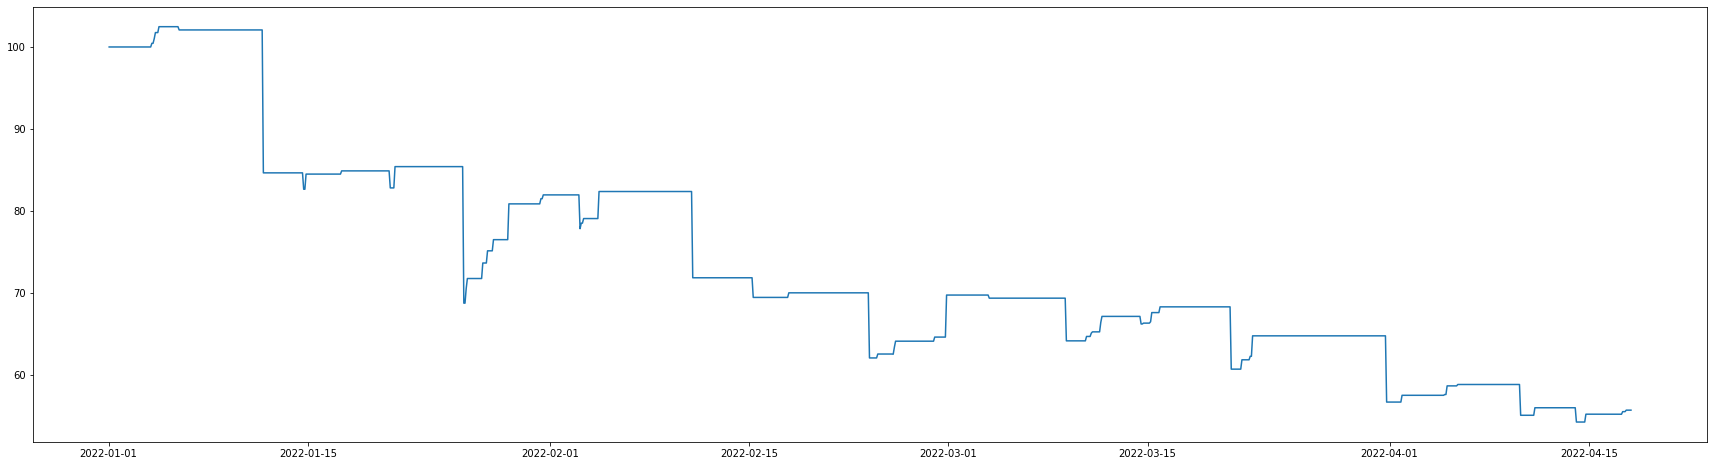

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 29.89%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 69.84%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 69.84%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       63.000000
mean        -0.796802
std          5.024831
min        -19.506159
25%         -0.387223
50%          0.694890
75%          1.671068
max          7.940398


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       63.000000
mean        -0.796802
std          5.024831
min        -19.506159
25%         -0.387223
50%          0.694890
75%          1.671068
max          7.940398




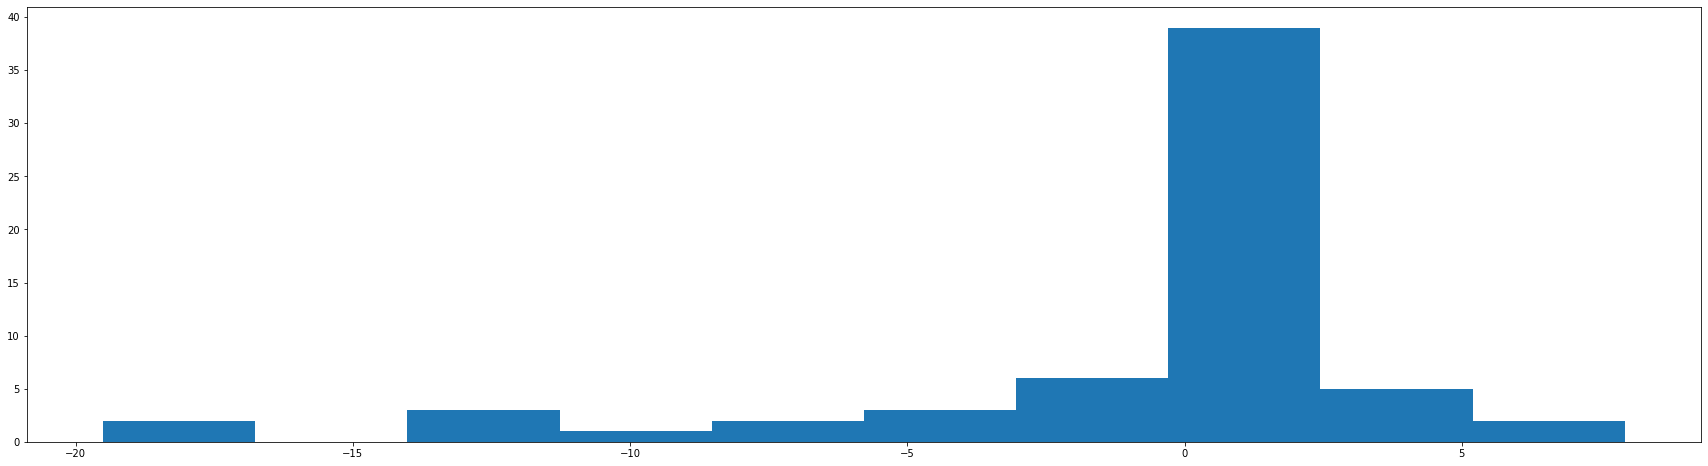

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)